In [18]:
# auto mask vgg model using computer vision
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# get the files in the folder
files = os.getcwd()

# folder inside the folder
files = os.listdir(files)
files


['.git',
 '.gitignore',
 'A.i_computer_vision_task.pdf',
 'annotate_mask_vgg.ipynb',
 'coco_mask',
 'contour.ipynb',
 'dataset',
 'logs',
 'Mask_RCNN',
 'mask_rcnn.ipynb',
 'mask_rcnn2.ipynb',
 'u_net_detect.ipynb',
 'via_project.xml']

In [20]:
# VGG annotation file for "accept001011.jpg4484"
# {
#     "accept001011.jpg4484": {
#         "filename": "accept001011.jpg",
#         "size": 4484,
#         "regions": [
#             {
#                 "shape_attributes": {
#                     "name": "polygon",
#                     "all_points_x": [
#                         59,
#                         59,
#                         60,
#                         46,
#                         36,
#                         41,
#                         38,
#                         37,
#                         37,
#                         36,
#                         47,
#                         51,
#                         55,
#                         61,
#                         71,
#                         75,
#                         74,
#                         73,
#                         73
#                     ],
#                     "all_points_y": [
#                         0,
#                         21,
#                         31,
#                         42,
#                         53,
#                         68,
#                         85,
#                         93,
#                         98,
#                         99,
#                         100,
#                         99,
#                         57,
#                         43,
#                         37,
#                         28,
#                         13,
#                         3,
#                         0
#                     ]
#                 },
#                 "region_attributes": {}
#             }
#         ],
#         "file_attributes": {}
#     },


In [21]:
# create a annotation file for all image
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_contours(image):
    # convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # apply gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # apply canny edge detection
    canny = cv2.Canny(blur, 50, 150)
    # apply dilation
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(canny, kernel, iterations=1)
    # apply erosion
    eroded = cv2.erode(dilated, kernel, iterations=1)
    # find contours
    contours, hierarchy = cv2.findContours(eroded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# function for drawing contours on an image
def draw_contours(image, contours):
    # draw contours on a copy of the image
    image_copy = np.copy(image)
    image_copy = cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 3)
    return image_copy

# function for sorting contours from left to right
def x_cord_contour(contour):
    # Get the bounding rectangle
    (x, y, w, h) = cv2.boundingRect(contour)
    # Return the x coordinate of the top-left corner of the bounding rectangle
    # If the bounding rectangle is empty, return a default value of -1
    return x if (x and y and w and h) else -1

# function for mask image
def mask_image(image, contours):
    # fill contours
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), 3)
    return mask

# function for displaying images
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')



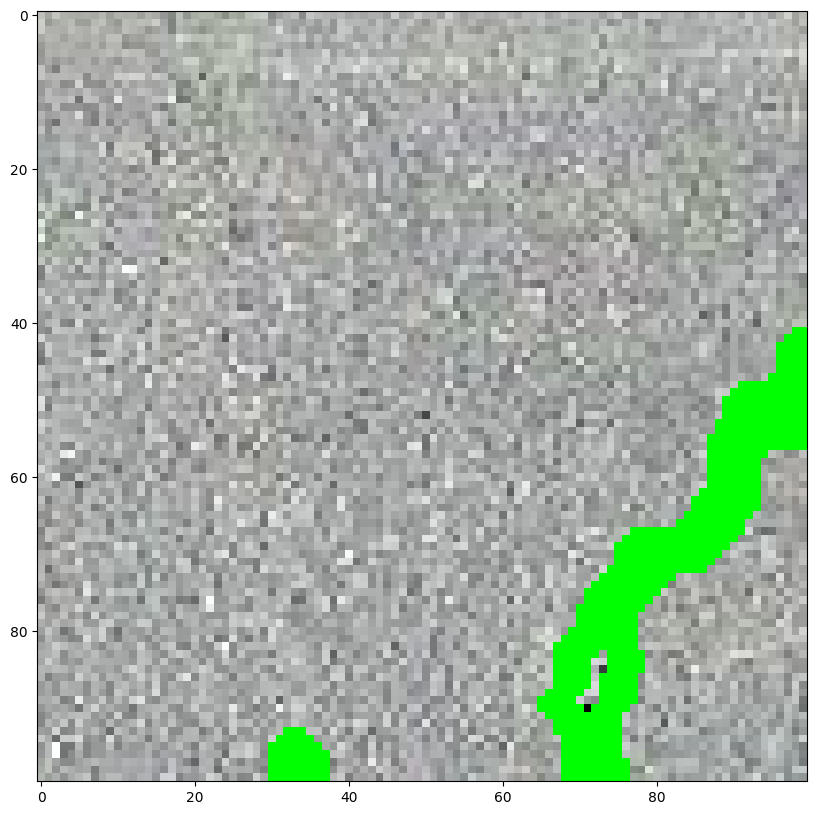

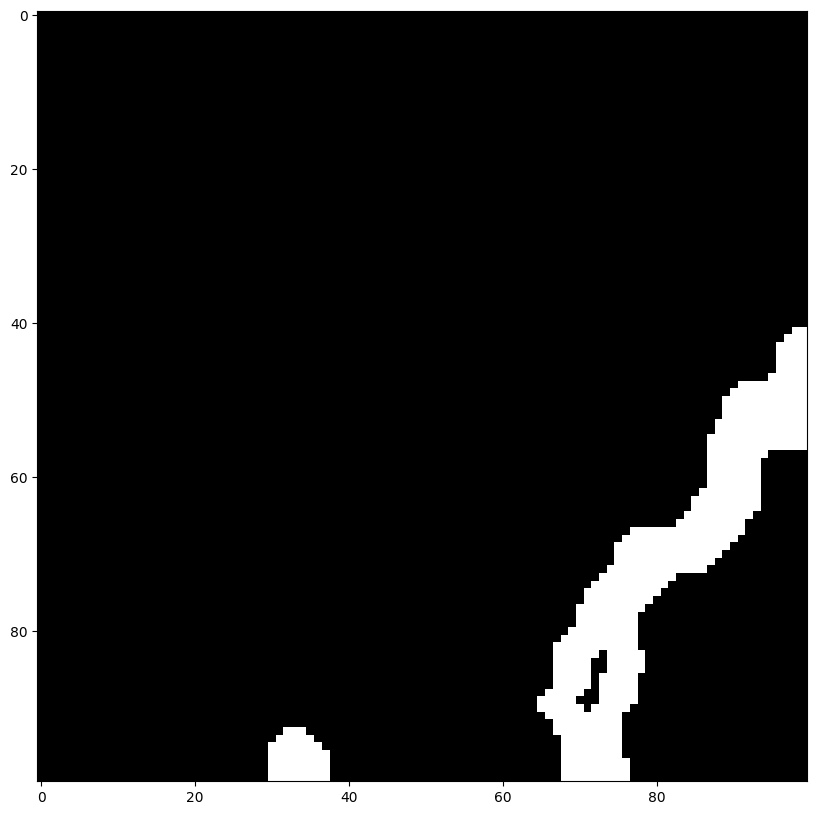

In [22]:
# load the image
image = cv2.imread('dataset/crack/accepted/accept001001.jpg')

# get contours
contours = get_contours(image)

# sort contours from left to right
contours = sorted(contours, key=x_cord_contour, reverse=False)

# draw contours on the image
image_with_contours = draw_contours(image, contours)

# mask image
mask = mask_image(image, contours)

# display the image with contours
display(image_with_contours)

# display the mask
display(mask)


In [23]:
# # Image Annotator for image segmentation using contours and masks in OpenCV

# # load the image
# image = cv2.imread('dataset/crack/accepted/accept001001.jpg')

# # sort contours left to right
# contours_sorted = sorted(contours, key=x_cord_contour, reverse=False)

# # draw contours on original image
# image_with_sorted_contours = draw_contours(image, contours_sorted)

# # display image with sorted contours
# display(image_with_sorted_contours)

# # mask image
# mask = mask_image(image, contours_sorted)


In [24]:
# create function for create annotation file
def create_annotation_file(file):
    # load the image
    image = cv2.imread(file)
    # get contours
    contours = get_contours(image)
    # sort contours left to right
    contours_sorted = sorted(contours, key=x_cord_contour, reverse=False)
    # draw contours on original image
    image_with_sorted_contours = draw_contours(image, contours_sorted)
    # mask image
    mask = mask_image(image, contours_sorted)
    
    # # display image with sorted contours
    # display(image_with_sorted_contours)
    # display(mask)
    # create annotation file

    filename = file.split('/')[-1]
    size = os.path.getsize(file)
    names = file.split('/')[1]
    regions = []
    for i in range(len(contours_sorted)):
        region = {}
        region['shape_attributes'] = {}
        region['shape_attributes']['name'] = 'polygon'
        region['shape_attributes']['all_points_x'] = []
        region['shape_attributes']['all_points_y'] = []
        for j in range(len(contours_sorted[i])):
            region['shape_attributes']['all_points_x'].append(contours_sorted[i][j][0][0])
            region['shape_attributes']['all_points_y'].append(contours_sorted[i][j][0][1])
        regions.append(region)
    file_attributes = {}
    data = {}
    region_attributes = {}
    region_attributes['name'] = names
    # add {filename}{size} to avoid duplicate key {filename}
    data = {f"{filename}{size}": {
        "filename": filename, 
        "size": size, 
        "regions": regions, 
        "file_attributes": file_attributes,
        "region_attributes": region_attributes,
        }}

    return data

In [26]:
# create annotation file for all image
def create_annotation_file_all_image(path):
    data = {}
    for file in os.listdir(path):
        if file.endswith('.jpg'):
            data.update(create_annotation_file(path+file))
    return data

In [27]:
many_data = 'dataset/crack/accepted/train/'
# get crack from my_data
crack = many_data.split('/')[1]
print(crack)


crack


In [28]:
# read 10 image
for i in range(3):
    file = many_data+os.listdir(many_data)[i]
    data = create_annotation_file(file)
    print(data)
    

{'accept001001.jpg4147': {'filename': 'accept001001.jpg', 'size': 4147, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [32, 32, 35, 35, 34], 'all_points_y': [95, 99, 99, 96, 95]}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [98, 98, 97, 97, 96, 91, 91, 90, 90, 89, 89, 87, 87, 82, 77, 77, 73, 73, 72, 72, 71, 69, 69, 67, 67, 68, 69, 69, 70, 70, 74, 74, 73, 73, 75, 75, 76, 76, 75, 75, 77, 77, 78, 79, 80, 80, 81, 86, 89, 89, 91, 91, 93, 94, 95, 99, 99], 'all_points_y': [43, 46, 47, 49, 50, 50, 52, 53, 54, 55, 61, 63, 64, 69, 69, 71, 75, 76, 77, 81, 82, 82, 87, 89, 90, 90, 91, 93, 94, 99, 99, 97, 96, 91, 89, 86, 85, 83, 82, 78, 76, 75, 74, 74, 73, 71, 70, 70, 67, 66, 64, 57, 55, 55, 54, 54, 43]}}], 'file_attributes': {}, 'region_attributes': {'name': 'crack'}}}
{'accept001002.jpg4421': {'filename': 'accept001002.jpg', 'size': 4421, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [31, 31, 32, 32, 30, 24, 24, 26, 27, 28, 28, 29, 29, 28,

In [29]:
import tqdm
# create annotation file for all image
directories = ['dataset/crack/accepted/train/', 'dataset/spall/accepted/train/']
for directory in directories:
    data = create_annotation_file_all_image(directory)
    with open(directory+'train.json', 'w') as outfile:
        # numpy array to list for json
        json.dump(data, outfile, default=lambda o: o.tolist())

data = create_annotation_file_all_image('dataset/crack/accepted/train/')
with open('dataset/crack/accepted/train.json', 'w') as outfile:
    # numpy array to list for json
    json.dump(data, outfile, default=lambda o: o.tolist())